# Notebook for visualizing the convergence of the MCMC algorithm

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [69]:
import sys
from pathlib import Path
logs_path = Path("/Users/lmmi/anon_sbm/logs")

# find all log files in the logs directory
log_files = list(logs_path.glob("*.csv"))

In [70]:
def determine_name(file_name, dataset_names):
    """
    Determine the name of the dataset based on the file name.
    """
    for name in dataset_names:
        if name in file_name:
            return name
    return "unknown"
dataset_names = [ "congress_twitter", "caltech_fb", "eu_email", ]

In [71]:
df_list = []

for log_file in log_files:
    df = pd.read_csv(log_file)
    df["name"] = determine_name(log_file.name, dataset_names)

    df_list.append(df)

df = pd.concat(df_list, ignore_index=True)

/var/folders/y6/j9fbqcvx6lb5l99614n30y4c0000gn/T/ipykernel_88748/2982452800.py:32: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()


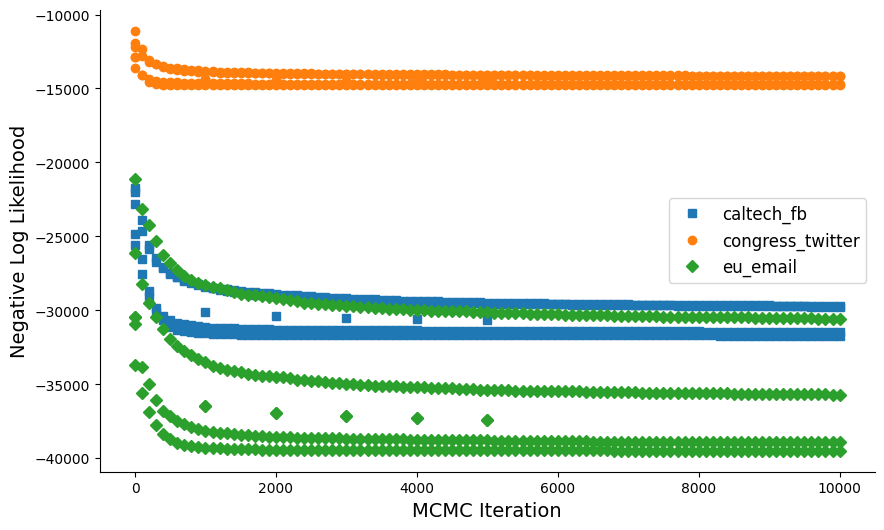

In [72]:
marker_styles = {
    "congress_twitter": "o",
    "caltech_fb": "s",
    "eu_email": "D",
}
colors = {
    "congress_twitter": "teal",
    "caltech_fb": "salmon",
    "eu_email": "black",
}


fig, ax = plt.subplots(figsize=(10, 6))

for name, group in df.groupby("name"):
    group = group.sort_values("iteration")
    ax.plot(
        group["iteration"],
        group["neg_log_likelihood"],
        label=name,
        linewidth=0,
        marker=marker_styles[name], # type: ignore
        )

plt.legend(fontsize=12)

ax.set_ylabel("Negative Log Likelihood", fontsize=14)
ax.set_xlabel("MCMC Iteration", fontsize=14)


ax.spines[['top', 'right']].set_visible(False)
fig.show()